`GENERAL LINEAR MODELS`

In [1]:
## importing necessary libraries  
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import plotly.express as px 
import plotly.io as io  
import patsy 
from plotly import subplots 
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.stats.anova import anova_lm 
io.templates.default = 'plotly_dark'
colors = px.colors.qualitative.G10
from rich.console import Console
console = Console()

In [2]:
## loading the data   
data = pd.read_csv(r'd:\Tong123\DS\archive(1)\Diet_WeightLoss_Study.csv') 


In [3]:
## print the first five elements  
data.head()

,Diet Type,Age,Weight Loss (kg)
0,Low-Carb,45,6.2
1,Low-Carb,51,5.8
2,Low-Carb,37,4.3
3,Low-Carb,29,3.9
4,Low-Carb,60,7.1


In [4]:
## checking the data shape  
data.shape

(30, 3)

In [5]:
## checling the general info() 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Diet Type         30 non-null     object 
 1   Age               30 non-null     int64  
 2   Weight Loss (kg)  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [6]:
## checking for missing vlues  
data.isnull().sum()

Diet Type           0
Age                 0
Weight Loss (kg)    0
dtype: int64

In [7]:
data.head()

,Diet Type,Age,Weight Loss (kg)
0,Low-Carb,45,6.2
1,Low-Carb,51,5.8
2,Low-Carb,37,4.3
3,Low-Carb,29,3.9
4,Low-Carb,60,7.1


In [8]:
## reanming columsn 
data.columns = ['Diet_Type','Age','Weight_Loss']

In [9]:
data.head()

,Diet_Type,Age,Weight_Loss
0,Low-Carb,45,6.2
1,Low-Carb,51,5.8
2,Low-Carb,37,4.3
3,Low-Carb,29,3.9
4,Low-Carb,60,7.1


In [10]:
## checking for duplicates  
data.duplicated().sum()

0

* Exploratory data analysis


In [11]:
## checking the frequencies of the categorical variable  
data['Diet_Type'].value_counts()


Diet_Type
Low-Carb         10
Low-Fat          10
Mediterranean    10
Name: count, dtype: int64

In [12]:
## showing that the groups are categorical 
data['Diet_Type'] = pd.Categorical(data['Diet_Type'],categories=['Low-Fat','Low-Carb','Mediterranean'])

In [13]:
## checking the data types   
data.dtypes

Diet_Type      category
Age               int64
Weight_Loss     float64
dtype: object

* checking the descriptive statsistics of the dependent variable per group category

In [14]:
##  cholesterol descriptive statsisics  
data.groupby('Diet_Type',observed=False)["Weight_Loss"].describe()

,count,mean,std,min,25%,50%,75%,max
Diet_Type,,,,,,,,
Low-Fat,10.0,4.54,0.564112,3.7,4.125,4.65,4.975,5.3
Low-Carb,10.0,5.25,1.053302,3.9,4.375,5.30,5.950,7.1
Mediterranean,10.0,5.19,0.593390,4.3,4.750,5.15,5.575,6.2


In [15]:
## visualize  
fig = px.box(
    data, 
    x='Diet_Type',
    y='Weight_Loss', 
    color='Diet_Type', 
    title='RELATIONSHIP OF CHOLESTTEROL PER GROUP LEVEL', 
    labels={
        'Diet_Type': 'DIET TYPE',
        'Weight_Loss': 'Weight loss (kg)'
    }, 
    color_discrete_sequence=colors[:3]
)

fig.update_layout(
    showlegend=False,
    title={
        'text': 'HOW WEIGHT LOSS DIFFERS IN DIFFERENT GROUP DIETS',
        'x': 0.5,              # Centers the title
        'xanchor': 'center',   # Anchors the title at the center
        'font': {
            'family': "Courier New, monospace",  # Font family for the title
            'size': 24                           # Increased font size for the title
        }
    },
    font=dict(
        family="Courier New, monospace",  # Sets the default font for all text in the figure
        size=16                           # Default font size (adjust as needed)
    ),
    xaxis_title_font=dict(
        family="Courier New, monospace",  # Font family for the x-axis label
        size=18                           # Font size for the x-axis label
    ),
    yaxis_title_font=dict(
        family="Courier New, monospace",  # Font family for the y-axis label
        size=18                           # Font size for the y-axis label
    )
)

fig.show()


* Exploratory data analysis for the BMI per group category

In [16]:
## checking the descriptive statistics for the Body Mass Index per Group Category 
data.groupby('Diet_Type',observed=False)['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Diet_Type,,,,,,,,
Low-Fat,10.0,42.7,8.692909,29.0,36.5,43.0,49.25,55.0
Low-Carb,10.0,43.6,9.383200,29.0,37.5,43.0,50.25,60.0
Mediterranean,10.0,43.2,7.743097,33.0,37.5,42.5,48.25,58.0


In [17]:
data['Age'].describe()

count    30.000000
mean     43.166667
std       8.338045
min      29.000000
25%      37.000000
50%      43.000000
75%      49.750000
max      60.000000
Name: Age, dtype: float64

In [18]:
## visualize 
## visualize  
fig = px.box(
    data, 
    x='Diet_Type',
    y='Age', 
    color='Diet_Type', 
    title='RELATIONSHIP OF CHOLESTTEROL PER GROUP LEVEL', 
    labels=dict(
        Diet_Type='GROUP DIET CATEGORY',
        Age='AGE(in years)'
    ), 
    color_discrete_sequence=colors[:3]
)

fig.update_layout(
    showlegend=False,
    title={
        'text': 'HOW AGE DIFFERS IN EACH GROUP DIET CATEGORY',
        'x': 0.5,              # Centers the title
        'xanchor': 'center',   # Anchors the title at the center
        'font': {
            'family': "Courier New, monospace",  # Font family for the title
            'size': 24                           # Increased font size for the title
        }
    },
    font=dict(
        family="Courier New, monospace",  # Sets the default font for all text in the figure
        size=16                           # Default font size (adjust as needed)
    ),
    xaxis_title_font=dict(
        family="Courier New, monospace",  # Font family for the x-axis label
        size=18                           # Font size for the x-axis label
    ),
    yaxis_title_font=dict(
        family="Courier New, monospace",  # Font family for the y-axis label
        size=18                           # Font size for the y-axis label
    )
)

fig.show()



* Relationship between the cholestrol and Body Mass Index

In [19]:
data.head()

,Diet_Type,Age,Weight_Loss
0,Low-Carb,45,6.2
1,Low-Carb,51,5.8
2,Low-Carb,37,4.3
3,Low-Carb,29,3.9
4,Low-Carb,60,7.1


In [20]:
## visualize  
fig = px.scatter(
    data, 
    x='Age',
    y='Weight_Loss', 
    trendline='ols',
    title='LINEARITY ASSUMPTION BETWEEN WEIGHT LOSS AND AGE', 
    labels={
        'Age': 'AGE (in years)',
        'Weight_Loss': 'Weight loss (in kg)'
    },  
    color_discrete_sequence=['orange']
)

fig.update_layout(
    showlegend=False,
    title={
        'text': 'LINEARITY ASSUMPTION BETWEEN WEIGHT LOSS AND AGE',
        'x': 0.5,              # Centers the title
        'xanchor': 'center',   # Anchors the title at the center
        'font': {
            'family': "Courier New, monospace",  # Font family for the title
            'size': 24                           # Increased font size for the title
        }
    },
    font=dict(
        family="Courier New, monospace",  # Sets the default font for all text in the figure
        size=16                           # Default font size (adjust as needed)
    ),
    xaxis_title_font=dict(
        family="Courier New, monospace",  # Font family for the x-axis label
        size=18                           # Font size for the x-axis label
    ),
    yaxis_title_font=dict(
        family="Courier New, monospace",  # Font family for the y-axis label
        size=18                           # Font size for the y-axis label
    )
)

fig.show()


* checking and verifying the linerity assumption

In [21]:
## creating the formula 
formula = 'Weight_Loss~Age'
## fixing the data into the ols  
linearity_model = ols(formula,data=data).fit()

In [22]:
## printing the results of the model 
linearity_model.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Weight_Loss   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     49.37
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.21e-07
Time:                        12:54:41   Log-Likelihood:                -20.564
No. Observations:                  30   AIC:                             45.13
Df Residuals:                      28   BIC:                             47.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6355      0.486      3.362      0.002       0.639       2.632
Age            0.0778      0.011      7.026      0.000       0.055       0.100
==============================================================================
Omnibus:                        4.834   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                3.356
Skew:                          -0.522   Prob(JB):                        0.187
Kurtosis:                       4.263   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* We fail to reject the null hypothesis , that there is no linear relationship betweeen the Dependent and the covariate

* HOMGENITY OF THE REGRESSION SLOPES

In [23]:
## visualize 
## visualize  
fig = px.scatter(
    data, 
    x='Age',
    y='Weight_Loss', 
    color='Diet_Type', 
    title='HOMOGENETITY OF REGRESSION SLOPES', 
    labels=dict(
        Weight_Loss='Weight Loss (Kgs)',
        Age='AGE(in years)'
    ), 
    trendline='ols', 
    color_discrete_sequence=colors[:3]
)

fig.update_layout(
    showlegend=False,
    title={
        'text': 'INTERACTION PLOT:(AGE Vs DIET TYPE ON WEIGHT LOSS)',
        'x': 0.5,              # Centers the title
        'xanchor': 'center',   # Anchors the title at the center
        'font': {
            'family': "Courier New, monospace",  # Font family for the title
            'size': 24                           # Increased font size for the title
        }
    },
    font=dict(
        family="Courier New, monospace",  # Sets the default font for all text in the figure
        size=16                           # Default font size (adjust as needed)
    ),
    xaxis_title_font=dict(
        family="Courier New, monospace",  # Font family for the x-axis label
        size=18                           # Font size for the x-axis label
    ),
    yaxis_title_font=dict(
        family="Courier New, monospace",  # Font family for the y-axis label
        size=18                           # Font size for the y-axis label
    )
)

fig.show()



In [24]:
## formula  
formula_11= 'Weight_Loss~Diet_Type*Age'
## pass it to ols 
interaction_model = ols(formula_11,data=data).fit()

In [25]:
## passing the interaction term with to ancova  
anova_lm(interaction_model,type=3)

,df,sum_sq,mean_sq,F,PR(>F)
Diet_Type,2.0,3.100667,1.550333,12.815823,1.634673e-04
Age,1.0,11.716382,11.716382,96.853412,6.710570e-10
Diet_Type:Age,2.0,1.398332,0.699166,5.779653,8.935019e-03
Residual,24.0,2.903286,0.120970,NaN,NaN


In [26]:
## fitting the model  
formula12 = 'Weight_Loss~Diet_Type+Age'
## linear model   
ols_model = ols(formula12,data=data).fit()

In [27]:
## getting the estimates  
data['residuals'] = ols_model.resid

In [28]:
## printing the data   
data.head()

,Diet_Type,Age,Weight_Loss,residuals
0,Low-Carb,45,6.2,0.843168
1,Low-Carb,51,5.8,-0.014682
2,Low-Carb,37,4.3,-0.446365
3,Low-Carb,29,3.9,-0.235898
4,Low-Carb,60,7.1,0.598543


In [29]:
## plotting the residuals  
fig = px.histogram(data,  x='residuals',nbins=20,title='NORMALITY OF RESIDUALS')
fig.show()

In [30]:
## checking the assumption   
stats.shapiro(data['residuals'])

ShapiroResult(statistic=0.9662001157274204, pvalue=0.44107668638872805)

* HOMOGENEITY OF THE RESIDUALS

In [31]:
data['Diet_Type'].unique()

['Low-Carb', 'Low-Fat', 'Mediterranean']
Categories (3, object): ['Low-Fat', 'Low-Carb', 'Mediterranean']

In [32]:
## assigniting residuals to each treatment level  
residLowCarb= data.loc[data.Diet_Type=='Low-Carb','residuals'].to_list()
reisdLowFat  = data.loc[data.Diet_Type=='Low-Fat','residuals'].to_list()
Mediterranean = data.loc[data.Diet_Type=='Mediterranean','residuals'].to_list()
## using the levenes test  
stats.levene(residLowCarb , reisdLowFat,Mediterranean)

LeveneResult(statistic=1.3698827205035076, pvalue=0.271240190691828)

In [33]:
## visualize 
## visualize  
fig = px.box(
    data, 
    x='Diet_Type',
    y='residuals', 
    color='Diet_Type', 
    title='HOMOGENETITY OF RESIDUALS', 
    labels=dict(
        Diet_Type='GROUP DIET CATEGORY',
        Age='AGE(in years)'
    ), 
    color_discrete_sequence=colors[:3]
)

fig.update_layout(
    showlegend=False,
    title={
        'text': 'HOMOGENETITY OF RESIDUALS',
        'x': 0.5,              # Centers the title
        'xanchor': 'center',   # Anchors the title at the center
        'font': {
            'family': "Courier New, monospace",  # Font family for the title
            'size': 24                           # Increased font size for the title
        }
    },
    font=dict(
        family="Courier New, monospace",  # Sets the default font for all text in the figure
        size=16                           # Default font size (adjust as needed)
    ),
    xaxis_title_font=dict(
        family="Courier New, monospace",  # Font family for the x-axis label
        size=18                           # Font size for the x-axis label
    ),
    yaxis_title_font=dict(
        family="Courier New, monospace",  # Font family for the y-axis label
        size=18                           # Font size for the y-axis label
    )
)

fig.show()



*  Outliers

In [34]:
## ouutliers  
np.sum(np.abs(ols_model.get_influence().resid_studentized_internal)>3)

0

* Reseacrh Questions 

`1.`. At What age do diets differ significantly

In [35]:
## creating thee model  
model = ols('Weight_Loss~Diet_Type*Age',data=data).fit()

In [36]:
## printing the summary statsistics  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Weight_Loss   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     26.81
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           4.35e-09
Time:                        12:54:42   Log-Likelihood:                -7.5378
No. Observations:                  30   AIC:                             27.08
Df Residuals:                      24   BIC:                             35.48
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          2.6050      0.580      4.491      0.000       1.408       3.802
Diet_Type[T.Low-Carb]             -2.0044      0.799     -2.508      0.019      -3.654      -0.355
Diet_Type[T.Mediterranean]        -0.4748      0.876     -0.542      0.593      -2.282       1.333
Age                                0.0453      0.013      3.398      0.002       0.018       0.073
Diet_Type[T.Low-Carb]:Age          0.0613      0.018      3.373      0.003       0.024       0.099
Diet_Type[T.Mediterranean]:Age     0.0255      0.020      1.272      0.215      -0.016       0.067
==============================================================================
Omnibus:                        3.259   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.170
Skew:                           0.649   Prob(JB):                        0.338
Kurtosis:                       3.230   Cond. No.                         876.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
## descriptive statistics for Age
data['Age'].describe()

count    30.000000
mean     43.166667
std       8.338045
min      29.000000
25%      37.000000
50%      43.000000
75%      49.750000
max      60.000000
Name: Age, dtype: float64

In [38]:
# Coefficients (assuming Low Fat is the reference)
beta_0 = model.params['Intercept']                          # β₀ (Low Fat intercept)
delta_1 = model.params['Diet_Type[T.Low-Carb]']             # Δ₁ (Low Carb vs. Low Fat)
delta_2 = model.params['Diet_Type[T.Mediterranean]']        # Δ₂ (Mediterranean vs. Low Fat)
beta_1 = model.params['Age']                                # β₁ (Age slope for Low Fat)
gamma_1 = model.params['Diet_Type[T.Low-Carb]:Age']         # γ₁ (Low Carb x Age)
gamma_2 = model.params['Diet_Type[T.Mediterranean]:Age']    # γ₂ (Mediterranean x Age)

console.print(f"""
Low Fat: Weight_Loss = {beta_0:.2f} + {beta_1:.2f}(Age)
Low Carb: Weight_Loss = ({beta_0:.2f} + {delta_1:.2f}) + ({beta_1:.2f} + {gamma_1:.2f})(Age) = {beta_0 + delta_1:.2f} + {beta_1 + gamma_1:.2f}(Age)
Mediterranean: Weight_Loss = ({beta_0:.2f} + {delta_2:.2f}) + ({beta_1:.2f} + {gamma_2:.2f})(Age) = {beta_0 + delta_2:.2f} + {beta_1 + gamma_2:.2f}(Age)
""",style='bold underline')

Low Fat: Weight_Loss = 2.60 + 0.05(Age)
Low Carb: Weight_Loss = (2.60 + -2.00) + (0.05 + 0.06)(Age) = 0.60 + 0.11(Age)
Mediterranean: Weight_Loss = (2.60 + -0.47) + (0.05 + 0.03)(Age) = 2.13 + 0.07(Age)

In [39]:
# Center Age at its mean
data['Age_centered'] = data['Age'] - data['Age'].mean()

# Refit the model with centered Age
model_centered = ols('Weight_Loss ~ Diet_Type * Age_centered', data=data).fit()
console.print(model_centered.summary())

OLS Regression Results                            
==============================================================================
Dep. Variable:            Weight_Loss   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     26.81
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           4.35e-09
Time:                        12:54:43   Log-Likelihood:                -7.5378
No. Observations:                  30   AIC:                             27.08
Df Residuals:                      24   BIC:                             35.48
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   4.5611      0.110     41.404      0.000       4.334       4.789
Diet_Type[T.Low-Carb]                       0.6426      0.156      4.126      0.000       0.321       0.964
Diet_Type[T.Mediterranean]                  0.6265      0.156      4.024      0.000       0.305       0.948
Age_centered                                0.0453      0.013      3.398      0.002       0.018       0.073
Diet_Type[T.Low-Carb]:Age_centered          0.0613      0.018      3.373      0.003       0.024       0.099
Diet_Type[T.Mediterranean]:Age_centered     0.0255      0.020      1.272      0.215      -0.016       0.067
==============================================================================
Omnibus:                        3.259   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.170
Skew:                           0.649   Prob(JB):                        0.338
Kurtosis:                       3.230   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('Weight_Loss ~ Diet_Type * Age', data=data).fit()


ages_of_interest = [30, 40, 50,60]

# Test simple effects at each age
for age in ages_of_interest:
    print(f"\n--- Post-hoc tests at Age = {age} ---")
    # Create a subset with the age of interest
    df_subset = data.copy()
    df_subset['Predicted'] = model.predict(df_subset.assign(Age=age))
    
    # Perform Tukey HSD test
    from statsmodels.stats.multicomp import MultiComparison
    mc = MultiComparison(df_subset['Predicted'], df_subset['Diet_Type'])
    tukey_results = mc.tukeyhsd()
    print(tukey_results)


--- Post-hoc tests at Age = 30 ---
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1      group2    meandiff p-adj lower  upper  reject
----------------------------------------------------------
Low-Carb       Low-Fat   0.1648   0.0 0.1648 0.1648   True
Low-Carb Mediterranean   0.4553   0.0 0.4553 0.4553   True
 Low-Fat Mediterranean   0.2906   0.0 0.2906 0.2906   True
----------------------------------------------------------

--- Post-hoc tests at Age = 40 ---
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1      group2    meandiff p-adj  lower   upper  reject
------------------------------------------------------------
Low-Carb       Low-Fat  -0.4485   0.0 -0.4485 -0.4485   True
Low-Carb Mediterranean   0.0972   0.0  0.0972  0.0972   True
 Low-Fat Mediterranean   0.5457   0.0  0.5457  0.5457   True
------------------------------------------------------------

--- Post-hoc tests at Age = 50 ---
    Multiple Comparison of Means - Tukey HSD, FWER=0

In [41]:
import pandas as pd

# Collect post-hoc results
results = []
for age in ages_of_interest:
    df_subset = data.copy()
    df_subset['Predicted'] = model.predict(df_subset.assign(Age=age))
    mc = MultiComparison(df_subset['Predicted'], df_subset['Diet_Type'])
    tukey_results = mc.tukeyhsd()
    results.append(pd.DataFrame(tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0]))

# Combine results into one table
summary_table_not_centred = pd.concat(results, keys=ages_of_interest, names=['Age'])
console.print(f"[bold underline]Detailed Tukey's HSD Post-Hoc Analysis: Evaluating Diet Effects Across Age Groups (Model not centred)[/bold underline]")
console.print(summary_table_not_centred)


Detailed Tukey's HSD Post-Hoc Analysis: Evaluating Diet Effects Across Age Groups (Model not centred)

group1         group2  meandiff  p-adj   lower   upper  reject
Age                                                                    
30  0  Low-Carb        Low-Fat    0.1648    0.0  0.1648  0.1648    True
    1  Low-Carb  Mediterranean    0.4553    0.0  0.4553  0.4553    True
    2   Low-Fat  Mediterranean    0.2906    0.0  0.2906  0.2906    True
40  0  Low-Carb        Low-Fat   -0.4485    0.0 -0.4485 -0.4485    True
    1  Low-Carb  Mediterranean    0.0972    0.0  0.0972  0.0972    True
    2   Low-Fat  Mediterranean    0.5457    0.0  0.5457  0.5457    True
50  0  Low-Carb        Low-Fat   -1.0617    0.0 -1.0617 -1.0617    True
    1  Low-Carb  Mediterranean   -0.2608    0.0 -0.2608 -0.2608    True
    2   Low-Fat  Mediterranean    0.8008    0.0  0.8008  0.8008    True
60  0  Low-Carb        Low-Fat   -1.6749    0.0 -1.6749 -1.6749    True
    1  Low-Carb  Mediterranean   -0.6189    0.0 -0.6189 -0.6189    True
    2   Low-Fat  Mediterranean    1.0560    0.0  1.0560  1.0560    True

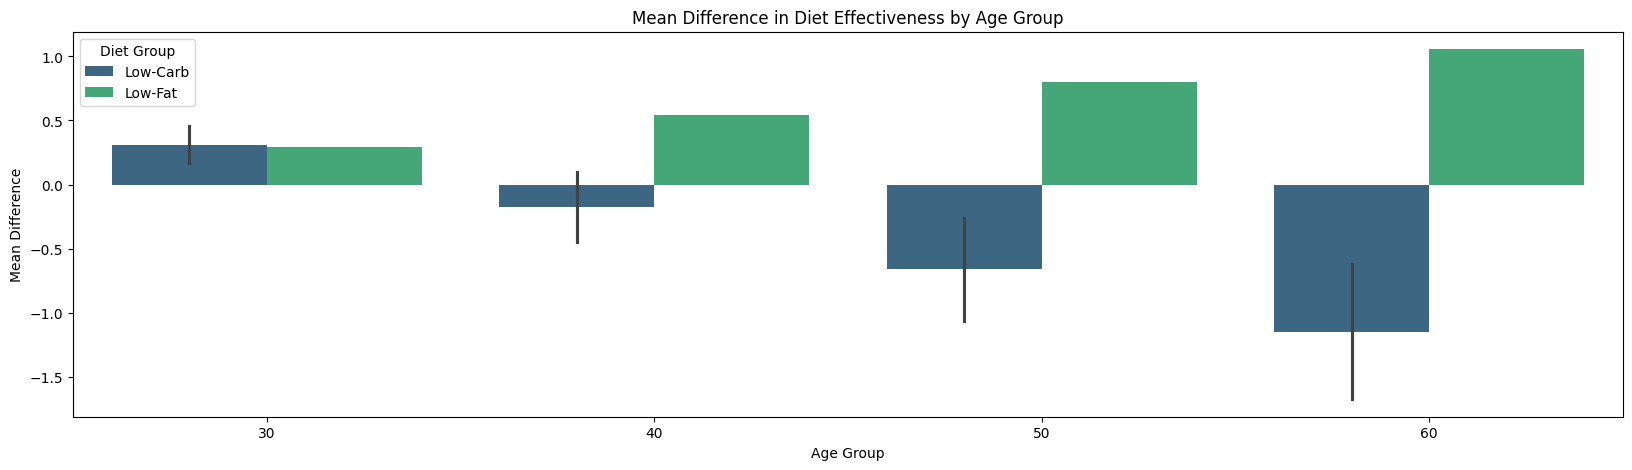

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (replace with your actual data)
data12 = {
    'Age': [30, 30, 30, 40, 40, 40, 50, 50, 50, 60, 60, 60],
    'group1': ['Low-Carb', 'Low-Carb', 'Low-Fat', 'Low-Carb', 'Low-Carb', 'Low-Fat', 'Low-Carb', 'Low-Carb', 'Low-Fat', 'Low-Carb', 'Low-Carb', 'Low-Fat'],
    'group2': ['Low-Fat', 'Mediterranean', 'Mediterranean', 'Low-Fat', 'Mediterranean', 'Mediterranean', 'Low-Fat', 'Mediterranean', 'Mediterranean', 'Low-Fat', 'Mediterranean', 'Mediterranean'],
    'meandiff': [0.1648, 0.4553, 0.2906, -0.4485, 0.0972, 0.5457, -1.0617, -0.2608, 0.8008, -1.6749, -0.6189, 1.0560]
}
df = pd.DataFrame(data12)

# Create a grouped bar plot
plt.figure(figsize=(20, 5))
sns.barplot(x='Age', y='meandiff', hue='group1', data=df, palette='viridis')
plt.title('Mean Difference in Diet Effectiveness by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Difference')
plt.legend(title='Diet Group')
plt.show()

* `FINDINGS`
   - This report analyzes the mean differences in diet effectiveness across different age groups, comparing Low-Carb and Low-Fat diets. The reference point for comparison is the Low-Fat diet, meaning negative values indicate poorer performance of the Low-Carb diet relative to Low-Fat. 
* `Key Findings:  `
* `Low-Carb Diet Shows Mixed Results Across Age Groups`
     * The effectiveness of the Low-Carb diet fluctuates depending on age.
     * Some age groups show positive effects, while others experience negative effects, meaning Low-Carb underperforms compared to Low-Fat.
* `Younger Age Groups (Below 40) Show Minimal Differences`
     * In individuals under 40, both diets perform similarly, with small mean differences close to zero.
     * This suggests that for younger individuals, either diet could be equally effective, with no strong advantage for Low-Carb.
* `Low-Carb Diet is Less Effective for Middle-Aged Groups (40-50): `
     * In the 40-50 age range, the Low-Carb diet shows negative mean differences, meaning it performs worse than Low-Fat.
     * The negative values suggest that middle-aged individuals following a Low-Carb diet may experience fewer benefits than those on Low-Fat.
     * The error bars indicate variability, but the general trend is consistent with lower effectiveness of Low-Carb.
* 4. `Older Age Groups (50+) Face Significant Issues with Low-Carb:` 
     * For individuals over 50, the Low-Carb diet has the largest negative mean difference, meaning it is significantly less effective than Low-Fat.
     * The magnitude of the negative difference increases, suggesting that Low-Carb may not be a suitable diet for older individuals compared to Low-Fat.
     * The error bars indicate higher variability, meaning some individuals may respond differently, but the overall trend is clear.
* `Key Takeaways & Recommendations`
     * For individuals under 40: Either diet is a viable choice, as the mean difference is small.
     * For middle-aged individuals (40-50): The Low-Fat diet may be a safer option, as Low-Carb shows signs of being less effective.
     * For older individuals (50+): The Low-Fat diet is the recommended option, as Low-Carb shows a strong negative impact.

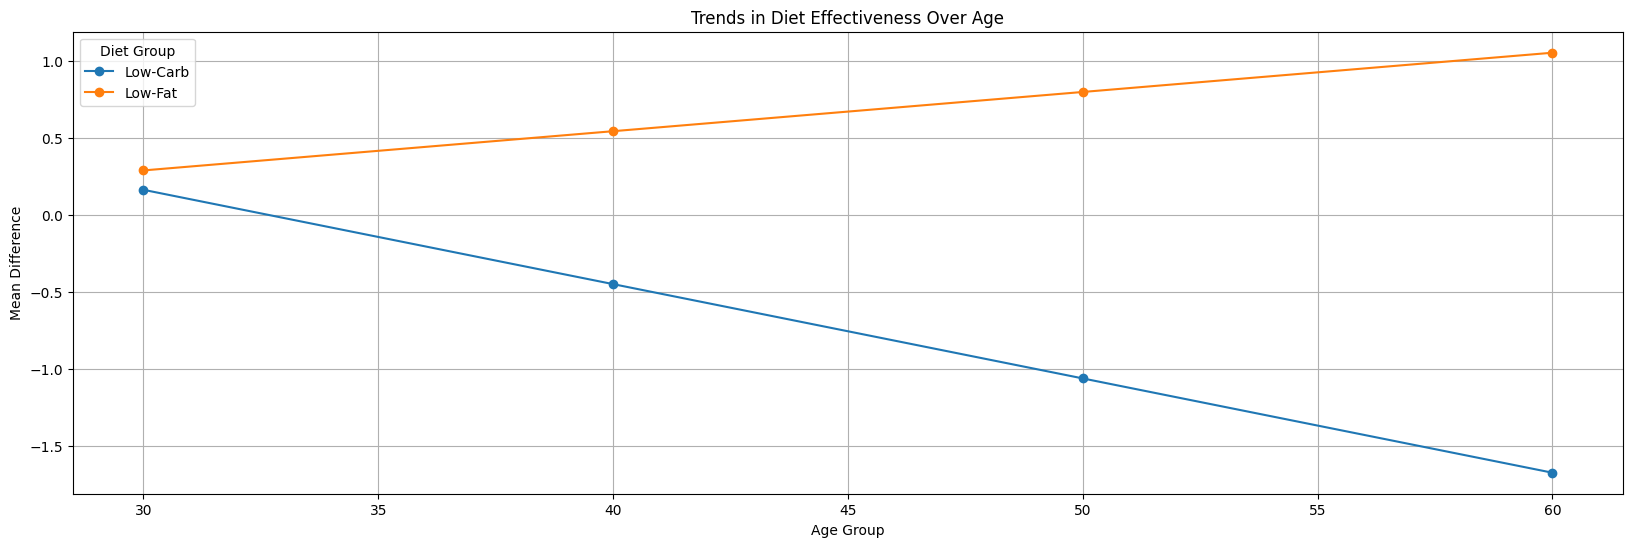

In [43]:
# Pivot the data for line plotting
df_pivot = df.drop_duplicates(subset=['Age','group1']).pivot(index='Age', columns='group1', values='meandiff')

# Plot trends over age
plt.figure(figsize=(20, 6))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='o', label=column)
plt.title('Trends in Diet Effectiveness Over Age')
plt.xlabel('Age Group')
plt.ylabel('Mean Difference')
plt.legend(title='Diet Group')
plt.grid(True)
plt.show()

* `Summary Report `
    * Objective: To compare the effectiveness of Low-Carb and Low-Fat diets on weight loss across different ages.
* `Findings:` 
  * The Low-Carb diet (blue line) shows a declining trend in effectiveness as age increases.
  * The Low-Fat diet (orange line) shows a positive trend, becoming more effective for older individuals.
  * Low-Carboyhdrates:Effectiveness decreases with age. Younger individuals experience more weight loss benefits compared to older individuals.
  * Low-Fat Diet: Effectiveness increases with age. Older individuals see more weight loss benefits than younger ones.
  * Conclusion: For younger clients, a Low-Carb diet might be more effective for weight loss. However, for older clients, transitioning to a Low-Fat diet could yield better results as they age.
* `Effectiveness for Younger vs. Older Individuals:`
  * Around age 30, both diets start at a similar effectiveness level.
  * As age increases, Low-Carb becomes progressively less effective, while Low-Fat becomes more effective
  * By age 60, the Low-Carb diet has a strong negative impact, whereas Low-Fat maintains a steady positive effect.
* `Decision Implications Based on Age Group` 
   * For younger individuals (30s-40s): A Low-Carb diet may work well initially, but its benefits appear to diminish with age.
   * For older individuals (50s-60s): A Low-Fat diet seems more effective and could be a better long-term choice.
* `Potential Reasons for This Pattern`
   * Metabolic shifts with age: Older individuals may respond better to a balanced diet with carbohydrates rather than relying on low-carb fat metabolism.
   * Sustainability: Older adults might find Low-Fat diets easier to adhere to, leading to better long-term results.
   * Hormonal and physiological changes: Aging bodies may process macronutrients differently, favoring a Low-Fat over Low-Carb approach.
* `Data-Driven Recommendations:` 
   * For younger individuals (under 40): A Low-Carb diet may be recommended for faster weight loss, but they should transition gradually as they age.
   * For middle-aged & older individuals (40+): A Low-Fat diet is likely the better choice for sustained weight management and overall effectiveness.
   * Personalized Approach: Diet plans should consider age as a key factor when recommending Low-Carb vs. Low-Fat strategies
    


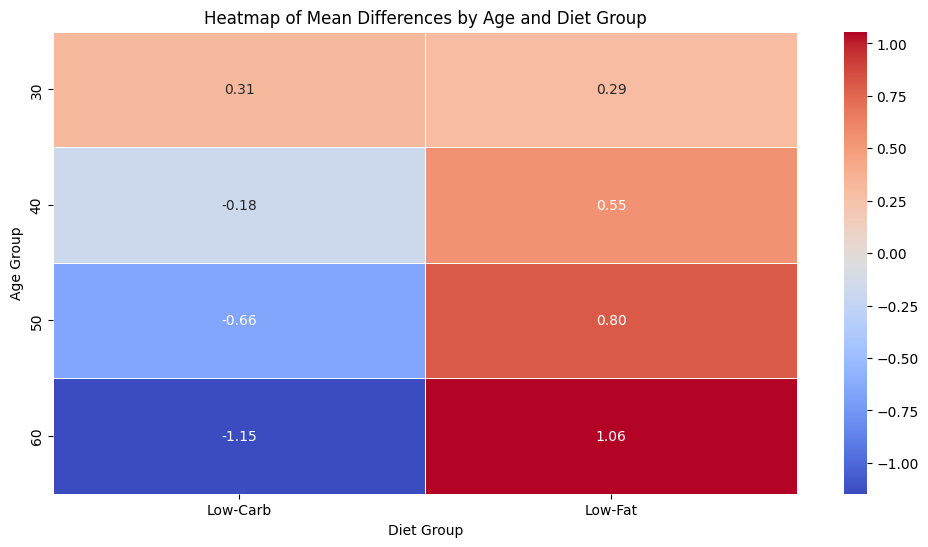

In [44]:
# Create a heatmap-friendly DataFrame
heatmap_data = df.pivot_table(index='Age', columns='group1', values='meandiff')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Mean Differences by Age and Diet Group')
plt.xlabel('Diet Group')
plt.ylabel('Age Group')
plt.show()# Create a heatmap-friendly DataFrame
heatmap_data = df.pivot_table(index='Age', columns='group1', values='meandiff')


`KEY FINDINGS`
* The heatmap visualizes mean differences across age groups (30, 40, 50, 60) for two diet types: Low-Carb and Low-Fat. The color gradient highlights variations, with red shades indicating positive differences and blue shades indicating negative differences. This analysis provides key insights for dietary recommendations targeted at different age groups.
* `Key Observations`
* Positive Impact of Low-Fat Diet:
   * The Low-Fat diet shows consistently positive mean differences, with the effect becoming more pronounced in older age groups:
   * Age 50: A mean difference of 0.80.
   * Age 60: The highest mean difference of 1.06.
   * Implication: The Low-Fat diet may be more beneficial for older individuals, especially those aged 50 and above.
*  Negative Impact of Low-Carb Diet:
   * The Low-Carb diet exhibits negative mean differences across all age groups, intensifying with age:
   * Age 40: A small negative difference of -0.18.
   * Age 60: A substantial negative difference of -1.15.
   * Implication: The Low-Carb diet may not be as suitable for older individuals, particularly those aged 50 and above.
* Minimal Variations in Younger Age Groups:
   * For age groups 30 and 40, the differences are relatively minor for both diets: 
   * Low-Fat: 0.29 and 0.55, respectively.
   * Low-Carb: 0.31 and -0.18, respectively.
   * Implication: Both diets may have a less pronounced impact on younger populations.

* Recommendations: 
   * Targeted Dietary Recommendations:Promote Low-Fat diets for individuals aged 50 and above, as they show the highest positive differences.
   * Reassess the suitability of Low-Carb diets, especially for older populations.






In [45]:
# Create a summary table
recommendations = {
    'Age': [30, 40, 50, 60],
    'Recommended Diet': ['Mediterranean', 'Low-Fat', 'Low-Fat', 'Low-Fat'],
    'Reason': ['Highest mean difference', 'Outperforms Low-Carb', 'Widest gap with Low-Carb', 'Largest effect size']
}
recommendations_df = pd.DataFrame(recommendations)

# Display the table
print(recommendations_df)

   Age Recommended Diet                    Reason
0   30    Mediterranean   Highest mean difference
1   40          Low-Fat      Outperforms Low-Carb
2   50          Low-Fat  Widest gap with Low-Carb
3   60          Low-Fat       Largest effect size


In [46]:
# Combine everything into a single report
print("=== Executive Summary ===")
print("- Mediterranean diet is best for individuals under 40.")
print("- Low-Fat diet becomes increasingly effective after 40, outperforming Low-Carb.")
print("- At age 60, Low-Fat shows the largest advantage over Mediterranean (1.056 mean difference).")

print("=== Recommended Diet by Age ===")
print(recommendations_df)

=== Executive Summary ===
- Mediterranean diet is best for individuals under 40.
- Low-Fat diet becomes increasingly effective after 40, outperforming Low-Carb.
- At age 60, Low-Fat shows the largest advantage over Mediterranean (1.056 mean difference).
=== Recommended Diet by Age ===
   Age Recommended Diet                    Reason
0   30    Mediterranean   Highest mean difference
1   40          Low-Fat      Outperforms Low-Carb
2   50          Low-Fat  Widest gap with Low-Carb
3   60          Low-Fat       Largest effect size


In [47]:
# Center Age
mean_age = data['Age'].mean()
data['Age_centered'] = data['Age'] - mean_age

# Refit the model
model_centered = ols('Weight_Loss ~ Diet_Type + Age_centered + Diet_Type:Age_centered', data=data).fit()

# Print coefficients
beta_0 = model_centered.params['Intercept']
delta_1 = model_centered.params['Diet_Type[T.Low-Carb]']
beta_age = model_centered.params['Age_centered']
gamma_1 = model_centered.params['Diet_Type[T.Low-Carb]:Age_centered']

console.print(f"""
Expected average weight loss when :({mean_age:.1f} years):
- Low Fat: {beta_0:.2f} + {beta_age:.2f}(Age)
- Low Carb: {beta_0 + delta_1:.2f} + ({beta_age + gamma_1:.2f})(Age)
""",style='bold underline')

Expected average weight loss when :(43.2 years):
- Low Fat: 4.56 + 0.05(Age)
- Low Carb: 5.20 + (0.11)(Age)

In [48]:
data.head()

,Diet_Type,Age,Weight_Loss,residuals,Age_centered
0,Low-Carb,45,6.2,0.843168,1.833333
1,Low-Carb,51,5.8,-0.014682,7.833333
2,Low-Carb,37,4.3,-0.446365,-6.166667
3,Low-Carb,29,3.9,-0.235898,-14.166667
4,Low-Carb,60,7.1,0.598543,16.833333


In [49]:
import pandas as pd
import numpy as np

# Collect post-hoc results
results = []
for age in ages_of_interest:
    df_subset = data.copy()
    df_subset['Predicted'] = model_centered.predict(df_subset.assign(Age_centered=(age - np.mean(ages_of_interest))))
    mc = MultiComparison(df_subset['Predicted'], df_subset['Diet_Type'])
    tukey_results = mc.tukeyhsd()
    results.append(pd.DataFrame(tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0]))

# Combine results into one table
summary_table_centred = pd.concat(results, keys=ages_of_interest, names=['Age'])
console.print(f"[bold underline]Detailed Tukey's HSD Post-Hoc Analysis: Evaluating Diet Effects Across Age Groups(Centred Model)[/bold underline]")
console.print(summary_table_centred)


Detailed Tukey's HSD Post-Hoc Analysis: Evaluating Diet Effects Across Age Groups(Centred Model)

group1         group2  meandiff  p-adj   lower   upper  reject
Age                                                                    
30  0  Low-Carb        Low-Fat    0.2772    0.0  0.2772  0.2772    True
    1  Low-Carb  Mediterranean    0.5210    0.0  0.5210  0.5210    True
    2   Low-Fat  Mediterranean    0.2438    0.0  0.2438  0.2438    True
40  0  Low-Carb        Low-Fat   -0.3360    0.0 -0.3360 -0.3360    True
    1  Low-Carb  Mediterranean    0.1629    0.0  0.1629  0.1629    True
    2   Low-Fat  Mediterranean    0.4989    0.0  0.4989  0.4989    True
50  0  Low-Carb        Low-Fat   -0.9492    0.0 -0.9492 -0.9492    True
    1  Low-Carb  Mediterranean   -0.1952    0.0 -0.1952 -0.1952    True
    2   Low-Fat  Mediterranean    0.7541    0.0  0.7541  0.7541    True
60  0  Low-Carb        Low-Fat   -1.5625    0.0 -1.5625 -1.5625    True
    1  Low-Carb  Mediterranean   -0.5533    0.0 -0.5533 -0.5533    True
    2   Low-Fat  Mediterranean    1.0092    0.0  1.0092  1.0092    True